In [1]:
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
class convertor():

    def eucalizationHistogram(self,image):
        L=256
        X=range(L)
        draw = ImageDraw.Draw(image) 
        width = image.size[0] 
        height = image.size[1] 
        pix = image.load() 

        histogram_R=[0]*L
        histogram_G=[0]*L
        histogram_B=[0]*L
        #насчитываем гистограмму
        for x in range(width):
            for y in range(height):
                histogram_R[pix[x, y][0]]+=1
                histogram_G[pix[x, y][1]]+=1
                histogram_B[pix[x, y][2]]+=1
        histogram_pR=[0]*L#частота появления пикселей с яркостью i
        histogram_pG=[0]*L#частота появления пикселей с яркостью i
        histogram_pB=[0]*L#частота появления пикселей с яркостью i
        for i in range(L):
            histogram_pR[i]=histogram_R[i]/width/height
            histogram_pG[i]=histogram_G[i]/width/height
            histogram_pB[i]=histogram_B[i]/width/height
        

        #fig, ax = plt.subplots()
       # ax.bar(X,histogram_p)

        s_R=[0]*L#новая яркость
        s_G=[0]*L#новая яркость
        s_B=[0]*L#новая яркость
        for k in range(L):
            for j in range(k+1):
                s_R[k]+=histogram_pR[j];
                s_G[k]+=histogram_pG[j];
                s_B[k]+=histogram_pB[j];
            s_R[k]=round((L-1)*s_R[k]);
            s_G[k]=round((L-1)*s_G[k]);
            s_B[k]=round((L-1)*s_B[k]);
        s_setR=set(s_R)
        s_setG=set(s_G)
        s_setB=set(s_B)
        histogram_p_newR=[0]*L#новая частота
        histogram_p_newG=[0]*L#новая частота
        histogram_p_newB=[0]*L#новая частота
        for i in s_setR:
            for j in range(L):
                if (s_R[j]==i):
                    histogram_p_newR[i]+=histogram_pR[j]
        for i in s_setG:
            for j in range(L):
                if (s_G[j]==i):
                    histogram_p_newG[i]+=histogram_pG[j]
        for i in s_setB:
            for j in range(L):
                if (s_B[j]==i):
                    histogram_p_newB[i]+=histogram_pB[j]

       # fig, ax = plt.subplots()
       # ax.bar(X,histogram_p_new)
        return s_R,s_G,s_B, histogram_pR,histogram_pG,histogram_pB, width, height
    def convertingHistogram(self, inputIm, shouldGet,name_in, name_sh):
        L=256
        X=range(L)
        s_R=[0]*L
        s_G=[0]*L
        s_B=[0]*L
        histogram_p_inputR=[0]*L
        histogram_p_inputG=[0]*L
        histogram_p_inputB=[0]*L
        [s_R,s_G,s_B, histogram_p_inputR,histogram_p_inputG,histogram_p_inputB,w_input, h_input]=self.eucalizationHistogram(inputIm)
        g_R=[0]*L
        g_G=[0]*L
        g_B=[0]*L
        histogram_p_shouldR=[0]*L
        histogram_p_shouldG=[0]*L
        histogram_p_shouldB=[0]*L
        [g_R,g_G,g_B, histogram_p_shouldR,histogram_p_shouldG,histogram_p_shouldB,w_should, h_should]=self.eucalizationHistogram(shouldGet)
        #отображение из s в z
        start_i=0
        #while(s[start_i]==0 and start_i<L):
        #    start_i+=1
        start_z=0
        #while(g[start_z]==0 and start_z<L):
        #    start_z+=1
        for i in range(start_i,L):
            minDiff=s_R[i]
            z=start_z
            min_z=start_z
            diff=abs(s_R[i]-g_R[z])
            while(minDiff>=diff and z<L-1):
                while(minDiff>diff and z<L-1):
                    min_z=z
                    minDiff=diff
                    z+=1
                    diff=abs(s_R[i]-g_R[z])

                while(minDiff==diff and z<L-1):
                    z+=1
                    diff=abs(s_R[i]-g_R[z])

            if(minDiff>diff):
                    min_z=z
                    minDiff=diff
            s_R[i]=min_z
        for i in range(start_i,L):
            minDiff=s_G[i]
            z=start_z
            min_z=start_z
            diff=abs(s_G[i]-g_G[z])
            while(minDiff>=diff and z<L-1):
                while(minDiff>diff and z<L-1):
                    min_z=z
                    minDiff=diff
                    z+=1
                    diff=abs(s_G[i]-g_G[z])

                while(minDiff==diff and z<L-1):
                    z+=1
                    diff=abs(s_G[i]-g_G[z])

            if(minDiff>diff):
                    min_z=z
                    minDiff=diff
            s_G[i]=min_z
        for i in range(start_i,L):
            minDiff=s_B[i]
            z=start_z
            min_z=start_z
            diff=abs(s_B[i]-g_B[z])
            while(minDiff>=diff and z<L-1):
                while(minDiff>diff and z<L-1):
                    min_z=z
                    minDiff=diff
                    z+=1
                    diff=abs(s_B[i]-g_B[z])

                while(minDiff==diff and z<L-1):
                    z+=1
                    diff=abs(s_B[i]-g_B[z])

            if(minDiff>diff):
                    min_z=z
                    minDiff=diff
            s_B[i]=min_z
        pix = inputIm.load() 
        s_setR=set(s_R)
        s_setG=set(s_G)
        s_setB=set(s_B)
        histogram_p_newR=[0]*L#новая частота
        histogram_p_newG=[0]*L#новая частота
        histogram_p_newB=[0]*L#новая частота
        for i in s_setR:
            for j in range(L):
                if (s_R[j]==i):
                    histogram_p_newR[i]+=histogram_p_inputR[j]
        for i in s_setG:
            for j in range(L):
                if (s_G[j]==i):
                    histogram_p_newG[i]+=histogram_p_inputG[j]
        for i in s_setB:
            for j in range(L):
                if (s_B[j]==i):
                    histogram_p_newB[i]+=histogram_p_inputB[j]
        fig, ax = plt.subplots()
        ax.bar(X,histogram_p_inputR, color = 'red')
        ax.bar(X,histogram_p_inputG, color = 'green')
        ax.bar(X,histogram_p_inputB, color = 'blue')
       # count_lvl=0
       # for i in range(L):
       #     if (histogram_p_input[i]>0):
       #         count_lvl+=1
       # print('Number of brightless level = ',count_lvl)
        fig, ax = plt.subplots()
        ax.bar(X,histogram_p_shouldR, color = 'red')
        ax.bar(X,histogram_p_shouldG,color = 'green')
        ax.bar(X,histogram_p_shouldB,color = 'blue')
        #count_lvl=0
       # for i in range(L):
       #     if (histogram_p_should[i]>0):
      #          count_lvl+=1
      #  print('Number of brightless level = ',count_lvl)
        fig, ax = plt.subplots()
        ax.bar(X,histogram_p_newR, color = 'red')
        ax.bar(X,histogram_p_newG,color = 'green')
        ax.bar(X,histogram_p_newB,color = 'blue')
       # count_lvl=0
       # for i in range(L):
      #      if (histogram_p_new[i]>0):
      #          count_lvl+=1
      #  print('Number of brightless level = ',count_lvl)
        #преобразование изображения
        draw = ImageDraw.Draw(inputIm) 
        # for i in range(L):
        for x in range(w_input):
            for y in range(h_input):
                #if(pix[x, y][0]==i):
                draw.point((x, y), (s_R[pix[x, y][0]], s_G[pix[x, y][1]], s_B[pix[x, y][2]]))
        file=name_in+name_sh+"result.jpg"
        inputIm.save(file, "JPEG")

0 - the end of program
Name of input image:desert
0 - the end of program
Name of shouldGet image:mountains
0 - the end of program
Name of input image:0


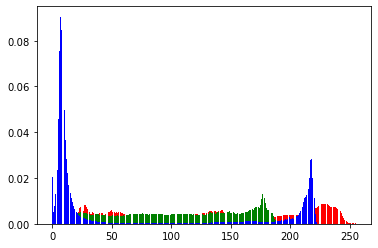

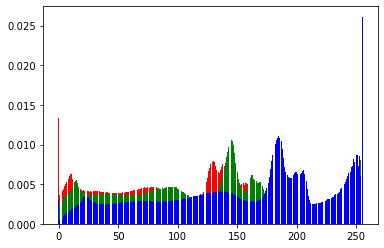

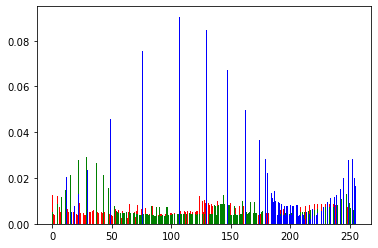

In [3]:
obj=convertor()
name_in = input('0 - the end of program\nName of input image:')
while(name_in!="0"):
    file=name_in+".jpg"
    inputIm = Image.open(file)
   
    name_sh = input('0 - the end of program\nName of shouldGet image:')
    file=name_sh+".jpg"
    shouldGet = Image.open(file)
    obj.convertingHistogram(inputIm, shouldGet, name_in, name_sh)
    name_in = input('0 - the end of program\nName of input image:')

In [ ]:
light